# GOOGLE PLAY STORE EDA !

In [2]:
# 1. Importing the dataset

import pandas as pd
df = pd.DataFrame(pd.read_csv('googleplaystore.csv'))

In [3]:
# 2. How many rows and columns are in the dataset?
print(f"ROWS->{df.shape[0]}\nCOLUMNS->{df.shape[1]}")

ROWS->10841
COLUMNS->13


In [4]:
# 3. Which columns are numeric and which are categorical?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# 4.How many missing values are there in each column?
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# Checking number of duplicate rows:
len(df[df.duplicated()])

483

In [7]:
# Dropping all duplicate rows
df = df.drop_duplicates()
# Now checking number of rows again:
print(f"ROWS->{df.shape[0]}")

ROWS->10358


In [8]:
# 5. What is the average rating of all apps?

# First Checking If Any Rating is Negative or Greater Than 5.0 (usual scale)
df[ (df['Rating']>5.0) | (df['Rating']<1.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
# Since, we got one corrupted row in which i guess columns are in-ordered and shifted, so its better to drop that single row!
df = df.drop(df.query("Rating < 1.0 | Rating > 5.0 ").index)

In [10]:
# now we can freely calculate the average rating of all apps
avg_rat = df['Rating'].mean()
print(f" AVERAGE RATING -> {avg_rat}")

 AVERAGE RATING -> 4.187876743139902


In [11]:
# 6. Which app has the maximum number of reviews?

# First checking the dtype of Reviews columns

df['Reviews'].dtype

dtype('O')

In [12]:
# ok, so it is an Object column with mostly numeric values. SO checking if it has any character with a numeric value:

mask = pd.to_numeric(df['Reviews'], errors='coerce').isna()
print(df[mask])

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [13]:
# ok, so no any row with a character value, so now we can convert our reviews column into an int
df['Reviews'] = df['Reviews'].astype('Int64')

In [14]:
# printing the app name with most reviews now

app_name = df[ (df['Reviews']==df['Reviews'].max()) ]['App'].iloc[0]
print(app_name)

Facebook


In [15]:
# Now checking if we have same apps (named) appearing more than one time including the original app
len(df[ df.duplicated(subset='App', keep=False)])

1221

In [16]:
# Now lets see them
df[ df.duplicated(subset='App', keep=False) ].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,textPlus: Free Text & Calls,SOCIAL,4.1,382120,28M,"10,000,000+",Free,0,Everyone,Social,"July 26, 2018",7.3.1,4.1 and up
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,"10,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


In [17]:
# Keeping the same app with highest reviews one only
df.sort_values(by='Reviews', ascending=False, inplace=True)

In [18]:
df = df.drop_duplicates(subset=['App'], keep='first')

In [19]:
df.sort_index(inplace=True)

In [20]:
# Drop will delete the old indices
df.reset_index(drop=True, inplace=True)

In [21]:
# Now checking the number of entries left:
print(f"ROWS->{df.shape[0]}")

ROWS->9659


In [22]:
# 7. What are the top 5 most common app categories?
df['Category'].value_counts().head(5)

Category
FAMILY      1875
GAME         946
TOOLS        829
BUSINESS     420
MEDICAL      395
Name: count, dtype: int64

In [23]:
# 5(2). Now calculating the average rating of all apps again
avg_app_rat = df['Rating'].mean()
print(avg_app_rat)

4.173267447535383


In [24]:
# 6(2). Now calculating which app has the maximum number of reviews again
df.query("Reviews == Reviews.max()")['App'].iloc[0]

'Facebook'

In [25]:
# 8. How many apps are Free vs Paid?
df.groupby('Type')['Type'].value_counts()

Type
Free    8904
Paid     754
Name: count, dtype: int64

In [26]:
# 9. Converting Installs into a numeric column by (removing + and ,)
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',','', regex=False).copy()

In [27]:
df['Installs'] = df['Installs'].astype('Int64')

In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [29]:
# 10. Converting Price into float (remove $).
df['Price'] = df['Price'].str.replace('$','',regex=False)

In [30]:
# 11. Handle missing values in Rating by filling with mean
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [31]:
df['Rating'].isnull().sum()

np.int64(0)

In [32]:
# 11. Identify invalid or unusual values in the Size column.
import numpy as np
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].str.replace('+', '', regex=False).str.replace(',', '' , regex=False)

In [33]:
# For Handling 'M' and 'k', multiplying M ones with 1000000 and k ones with 1000
def clean(size):
    x = str(size)
    if x == 'nan':
        return np.nan
    if 'M' in x:
        return float(x.replace('M',''))*1_000_000
    if 'k' in x:
        return float(x.replace('k',''))*1_000
    return float(x)

In [34]:
# Using the above method to impute clean numbers
df['Size'] = df['Size'].apply(clean)

In [35]:
df['Size'] = df['Size'].fillna(df['Size'].mean())

df['Size'].isnull().sum()

np.int64(0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   Int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   Int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: Int64(2), float64(2), object(9)
memory usage: 1000.0+ KB


In [37]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [38]:
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

In [39]:
# 12. Which category has the highest average rating?
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(1).index[0]

'EVENTS'

In [40]:
# 13. Which category has the most apps?
df.groupby('Category')['Installs'].max().sort_values(ascending=False).head(1).index[0]

'BOOKS_AND_REFERENCE'

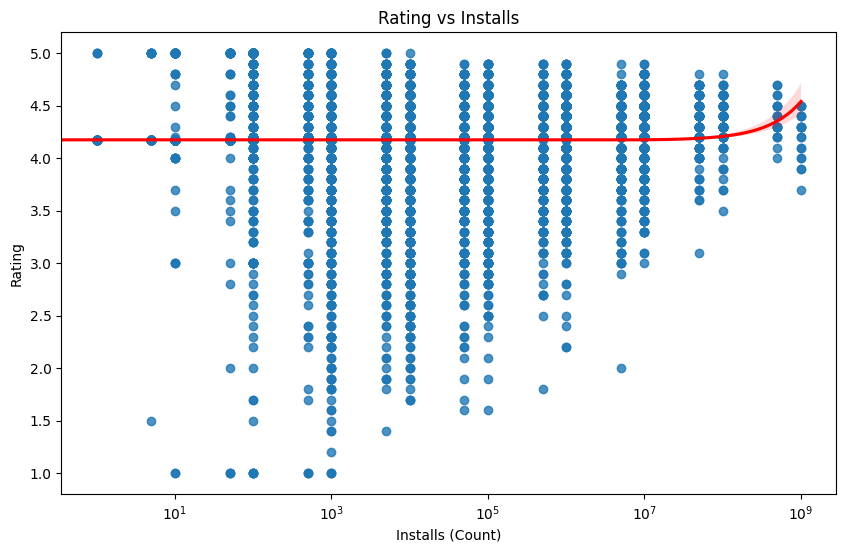

In [41]:
# 14. Is there a relationship between Installs and Reviews?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.regplot(x='Installs', y='Rating', data=df, line_kws={'color': 'red'})

plt.title('Rating vs Installs')
plt.xlabel('Installs (Count)')
plt.ylabel('Rating')
plt.xscale('log') 
plt.show()

In [42]:
# 15. Do paid apps have higher ratings than free apps?
df.groupby('Type')['Rating'].mean()

Type
Free    4.167260
Paid    4.244213
Name: Rating, dtype: float64

In [43]:
# Answer: Yes! Paid Apps have a slightly higher rating than Free Apps

In [44]:
# 16. Which Content Rating category is most common?
df['Content Rating'].mode()[0]

'Everyone'

In [45]:
# 17. What are the top 10 most installed apps?
list (df.sort_values(by='Installs', ascending=False)['App'].head(10))

['Google',
 'YouTube',
 'Google Play Movies & TV',
 'Subway Surfers',
 'Google News',
 'Google Play Games',
 'Instagram',
 'Google Play Books',
 'Gmail',
 'Maps - Navigate & Explore']

In [46]:
# 18. Which genres appear in multiple categories?
def remove_dups(genre_string):
    parts = genre_string.split(';')
    if ( (len(parts)>1) and (parts[0]==parts[1]) ):
        return parts[0]
    return parts

In [47]:
df['Genres'] = df['Genres'].apply(remove_dups)

In [48]:
df[ df['Genres'].apply(len)>1 ]['Genres'].astype(str).unique()

array(["['Art & Design', 'Creativity']", "['Comics', 'Creativity']",
       "['Education', 'Creativity']", 'Education',
       "['Education', 'Pretend Play']", "['Education', 'Brain Games']",
       "['Entertainment', 'Brain Games']",
       "['Entertainment', 'Creativity']",
       "['Entertainment', 'Music & Video']",
       "['Lifestyle', 'Pretend Play']", "['Simulation', 'Education']",
       "['Action', 'Action & Adventure']", "['Casual', 'Brain Games']",
       "['Educational', 'Creativity']", "['Puzzle', 'Brain Games']",
       "['Educational', 'Education']", "['Casual', 'Pretend Play']",
       "['Educational', 'Brain Games']",
       "['Art & Design', 'Pretend Play']",
       "['Educational', 'Pretend Play']",
       "['Entertainment', 'Education']", "['Casual', 'Education']",
       "['Casual', 'Creativity']", "['Casual', 'Action & Adventure']",
       "['Music', 'Music & Video']", "['Arcade', 'Pretend Play']",
       "['Adventure', 'Action & Adventure']",
       "['Role Play

In [49]:
# 19. Convert Last Updated to datetime.
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [50]:
# 20. How many apps were updated in 2018?
len (df [df['Last Updated'].dt.year == 2018])

6287

In [51]:
# 21. Create a new column Year_Updated.
df['Year_Updated'] = df['Last Updated'].dt.year

In [52]:
# 22. Which year had the most app updates?
print (df['Year_Updated'].value_counts().index[0] )

2018


In [53]:
# 23. Do newer apps tend to have higher ratings?
df.groupby('Year_Updated')['Rating'].mean().sort_values(ascending=False)

# ANSWER: Not Really ! :)

Year_Updated
2018    4.219883
2010    4.200000
2017    4.105950
2013    4.084929
2015    4.081314
2016    4.064138
2014    4.047744
2011    3.966667
2012    3.860244
Name: Rating, dtype: float64

In [54]:
df['Current Ver'] = df['Current Ver'].ffill()
df['Android Ver'] = df['Android Ver'].bfill()

In [55]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Year_Updated      0
dtype: int64

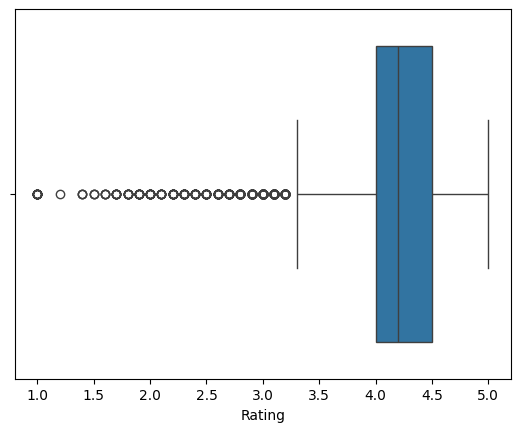

In [56]:
# Outliers in Rating

sns.boxplot(x=df['Rating'])
plt.show()

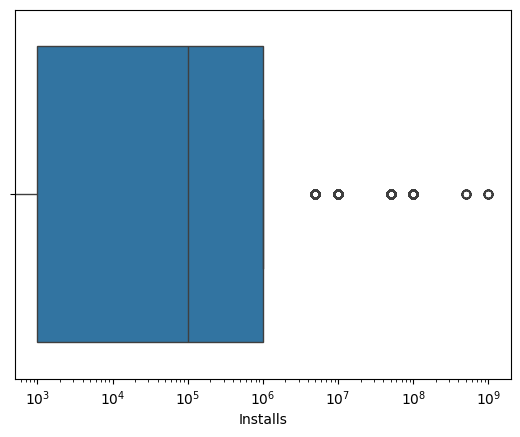

In [57]:
# Outliers in Installs

g = sns.boxplot(x=df['Installs'])
g.set_xscale('log')
plt.show()

In [58]:
# IN OUR SPECIFIC DATASET, ESPECIALLY THE OUTLIERS OF INSTALLS AND RATINGS MUST NOT BE REMOVED
# AS THEY ARE VALID VALUES (NOT SOMETHING UNUSUAL). SOME APPS HAVE 1B+ INSTALLS WHILE MAJORITY
# LIE IN THE RANGE OF 1000 TO 1M !

# SIMILARLY, MOST APPS IN OUR DATASET HAD RATING IN B/W 4 TO 4.5 WHILE SOME RATINGS WERE BELOW 
# 3.0 (VALID BUT NOT IN THE CLUB OF 4 - 4.5) MAKING THEM THE OUTLIERS !

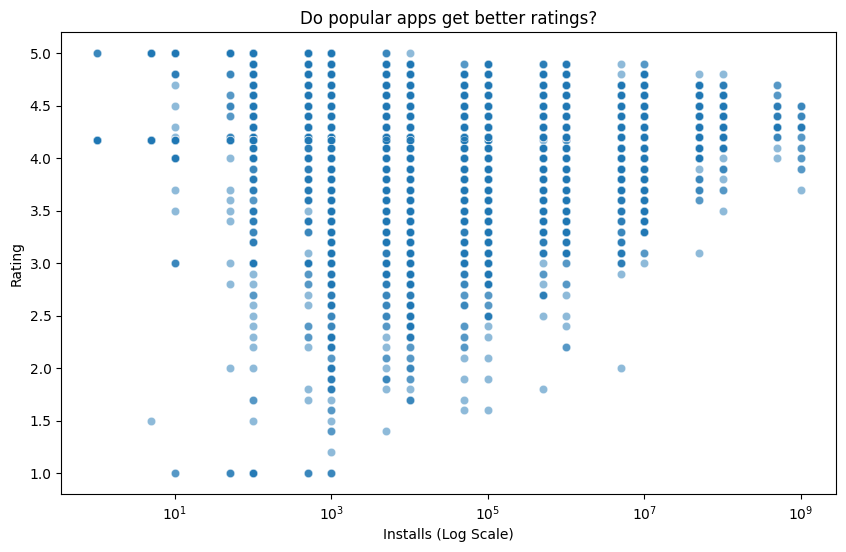

In [59]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Installs'], y=df['Rating'], alpha=0.5)

plt.xscale('log')

plt.title('Do popular apps get better ratings?')
plt.xlabel('Installs (Log Scale)')
plt.ylabel('Rating')
plt.show()

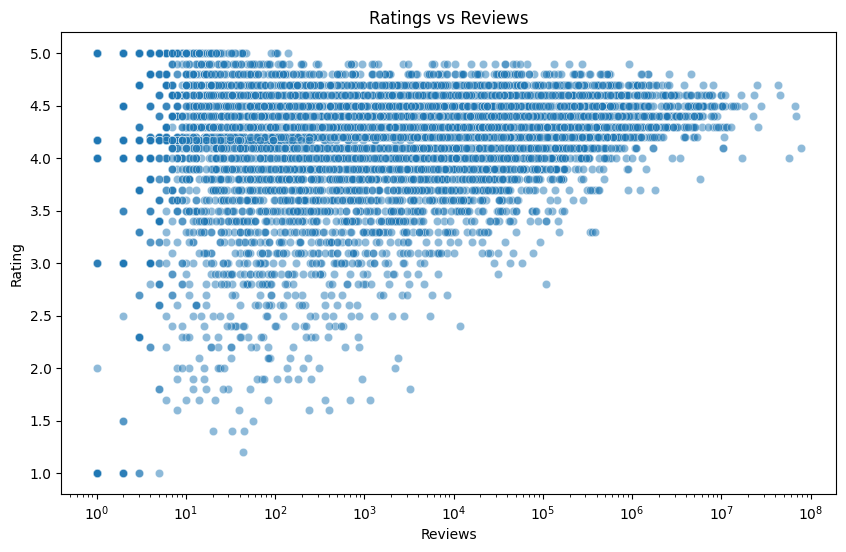

In [60]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Reviews'], y=df['Rating'], alpha=0.5)

plt.xscale('log')

plt.title('Ratings vs Reviews')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()

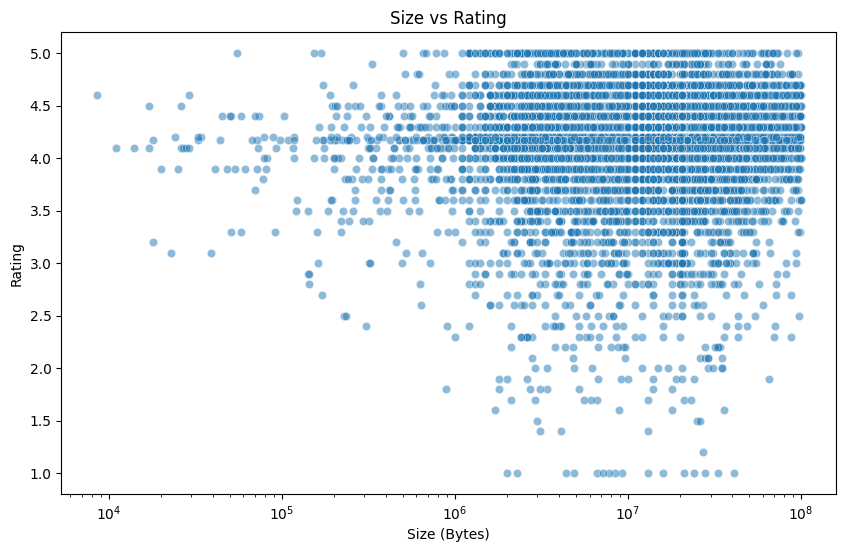

In [61]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Size'], y=df['Rating'], alpha=0.5)

plt.xscale('log')

plt.title('Size vs Rating')
plt.xlabel('Size (Bytes)')
plt.ylabel('Rating')
plt.show()

In [62]:
# We can safely say that those apps whose size is in bw 10^6 to 10^8 tend to have better rating (4.0 to 5.0) 

In [63]:
# 24. Which Variables Affect The INSTALLS MOST

correlation_matrix = df.corr(numeric_only=True)

installs_influence = correlation_matrix['Installs'].sort_values(ascending=False)

print(installs_influence * 100)

Installs        100.000000
Reviews          62.505808
Year_Updated      6.883565
Size              5.791669
Rating            4.016906
Name: Installs, dtype: float64


In [64]:
df.to_csv('cleaned_google_play_store_data_v1.csv', index=False)

THANK YOU !